# **Part A: Airbnb Price Prediction and Insights**

We are working on a machine learning project titled "Airbnb Price Prediction and Insights," which aims to build a regression model to predict Airbnb listing prices based on features such as property type, room type, location, amenities, and host characteristics.

## Data Exploration and Preprocessing

After importing all neccessary libraries and reading the file using pandas, We will run EDA as part of our data exploration and preprocessing. It is important to know the structure and summary of the dataset before working on it. Also we have to check if there are any missing values and if any column has outliers.

### Information about structure of our dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import re
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("Airbnb_data-copy.csv")

In [8]:
print(df.shape)
print(df.dtypes)
df.head()

(74111, 29)
id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dt

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


#### Findings

 * The provided dataset has 74111 rows and 29 columns. We can check the data types for each column.
 * The columns bathrooms, bedrooms and beds should contain integer values only (1, 2, 3 bathrooms like) but the datatype for these columns is showing float meaning there are some decimal values for example 1.5 bathroom is unvalid. We should handle this.
 * Most of the columns are of object type which are strings or dates and other are numerical. We will distinguish them in categories as **Nominal, Ordinal_Categorical** and **Ordinal_Numerical**. These need feature transformation.
 * Column **amenities** should be handled in **feature engineering** by extracting all the mentioned facilities in that column.
 * As we can notice in the sample data above some of the columns have irrelevant descriptive data. The columns like **id, description, name** and **thumbnail_url** are of no use in regression model for finding any pattern or relation with target variable. So we will drop them.
 * Column **host_response_rate** is a host's response rate in percentage and it should be a numerical value.
 * We have **city, latitude, longitude, neighborhood, zipcode** columns which provides the information about the location of the listing. From which city column and Longitude-Latitude data could be enough to extract location information.

### Describing data with Summary Statistics

In [11]:
#converting possible object-data column into numerical
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float)

numerical_cols = []
for column in df.columns:
    if df[column].dtype in ["int64", "float64"]:
        numerical_cols.append(column)
        
numerical_cols

['id',
 'log_price',
 'accommodates',
 'bathrooms',
 'host_response_rate',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

In [12]:
df.describe()

,id,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,55812.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,94.351967,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,16.341817,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,100.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,100.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,100.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,100.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


#### Findings

 * Log price is mostly distributed from 4.3 to 5.2 but the min value is 0 and exp(0) is 1 so minimum price is 1 unit only so it could be invalid.
 * Columns like **accomodates, bathrooms, number of reviews, bedrooms, beds** are showing very high maximum value but comparatively low value upto 75 percentile. Which basically means there are outliers in these columns. ***(Part- outliers detection)***
 * Minimum number of bathrooms is showing as 0, we should check the listing type for these rows (0 bathrooms) and how many zeros are there for such columns. If the listing is of **Single room/Private room/Shared room** then these zeros might be true else we will impute those zeros and missing values with  1 because most of properties have atleast 1 bathroom.
 * Data in number of reviews seems highly skewed by noticing mean and std. deviation. Value range is 0 to 605 and it can be problematic to fit model on such data. ***(Part - outliers detection)***
 * Review scores rating with mean 94 and median 96 is fine but we should handle missing values with median here.
 * In bedrooms and beds columns, minimum value is 0 and should be handled appropriately. We dont know if its a combine bedroom or not so categorical binning like yes/no could help here.

##### As a next step, we will examine how many zero values are there for columns where zero might be invalid.

In [14]:
(df[numerical_cols] == 0).sum().sort_values(ascending= False)

number_of_reviews       15819
bedrooms                 6715
host_response_rate        883
bathrooms                 198
beds                        4
log_price                   1
id                          0
accommodates                0
latitude                    0
longitude                   0
review_scores_rating        0
dtype: int64

####
##### Examining the listing type if there are no bedrooms

In [16]:
df[df['bedrooms'] == 0][['room_type','bed_type', 'bedrooms']]

,room_type,bed_type,bedrooms
4,Entire home/apt,Real Bed,0.0
55,Entire home/apt,Real Bed,0.0
64,Entire home/apt,Real Bed,0.0
69,Entire home/apt,Real Bed,0.0
96,Entire home/apt,Real Bed,0.0
...,...,...,...
74086,Private room,Real Bed,0.0
74087,Entire home/apt,Real Bed,0.0
74091,Entire home/apt,Real Bed,0.0
74098,Entire home/apt,Real Bed,0.0


In [17]:
room_bed = df[df['bedrooms'] == 0][['room_type','bed_type', 'bedrooms']]
room_bed.nunique()

room_type    2
bed_type     5
bedrooms     1
dtype: int64

####
##### Examining the listing type if there are no bathrooms

In [19]:
df[df['bathrooms'] == 0][['room_type', 'bathrooms']]

,room_type,bathrooms
318,Private room,0.0
1356,Shared room,0.0
1441,Private room,0.0
1704,Private room,0.0
1819,Private room,0.0
...,...,...
72781,Private room,0.0
72920,Private room,0.0
73077,Private room,0.0
73301,Shared room,0.0


 * Log price has only 1 row with zero value so we will drop it.
 * bedrooms column with large number of zeros could mean the listings are of combined room type and are still rentable so we examined the data having bedrooms=0,
    * we can notice that there are two uniqe values in room_type for bedrooms = 0 (Entire home/apt , Private room)
    * Even though the room type is **Entire home/apt** there are no bedrooms (seems irrelevant) so we can replace these zeros with median value and create a new flagging column for these zeros.
 * We examined those listings having zero bathrooms and our previous guess is right that these zeros are true because those rooms are private and shared room type. So we will keep it as is.
 * Huge count of zeros in number of reviews but it only means no reviews so we will keep it as is.
 * small count of zeros in beds column can be replaced with median value.

### Outliers Checking

Now we will perform outliers detection for above numerical data columns. We will choose only relevant columns which are subject to distribution. (removing longitude, latitude, etc.)

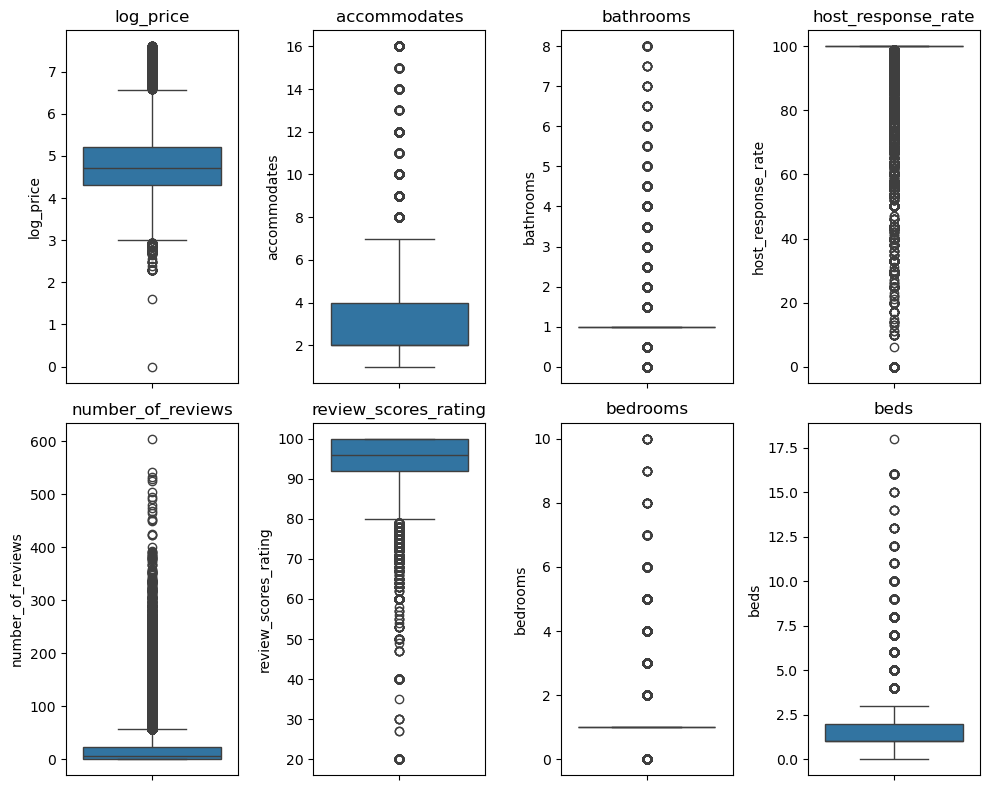

In [22]:
numerical_cols = ['log_price', 'accommodates', 'bathrooms', 'host_response_rate', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

plt.figure(figsize = (10,8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2,4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#### Findings

 * In above boxplots, we can notice potential outliers in each numerical column.
 * Even though there are outliers in columns accomodates, bathrooms, bedrooms and beds, those may be valid because these extreme data show availability of large listings. So we mark them as contextual outliers.
 * Outliers in 'host_response_rate' could mean there are some low ratings and most of the data is distributed near 100 showing high number of  ratings.
 * It is very challenging part to handle these outliers because we have to define which method should be applied on each column. Some of these columns need standardization and scale transformation. So as a better option I am using Log1p transformation here.

### Missing Values Analysis

In [25]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_percentage})
print(missing_df[missing_df['Missing Count'] > 0])

                        Missing Count  Missing %
host_response_rate              18299  24.691341
review_scores_rating            16722  22.563452
first_review                    15864  21.405729
last_review                     15827  21.355804
thumbnail_url                    8216  11.086074
neighbourhood                    6872   9.272578
zipcode                           968   1.306149
bathrooms                         200   0.269865
host_identity_verified            188   0.253674
host_since                        188   0.253674
host_has_profile_pic              188   0.253674
beds                              131   0.176762
bedrooms                           91   0.122789


### Findings

 * There are 4 columns with more than 20% missing values which can be problematic as such proportion of missing values may statistically affect our analysis. These 4 columns are providing information about ratings and reviews and it is important to predict pricing. This blank information shows that hosts are not actively responsing and reviewing.
 * We should examine if the missing value is really a missing or absence of category.

#### Visualizing Missing Values and Checking Data/Labels

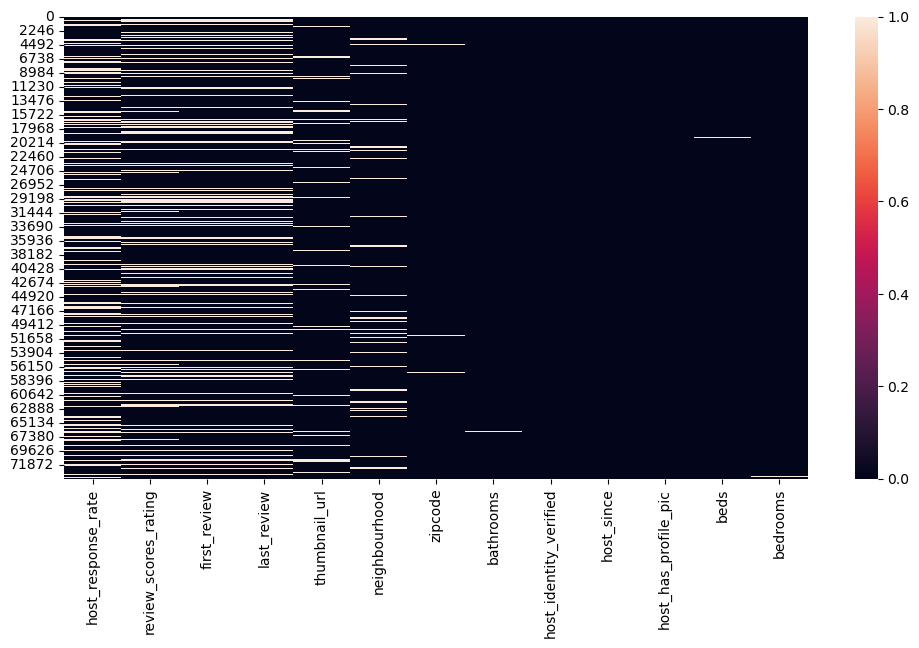

In [28]:
plt.figure(figsize = (12,6))
sns.heatmap(df[missing[missing > 0].index].isnull())
plt.show()

In [29]:
df[list(missing_df[missing_df['Missing Count'] > 0].index)].head()

,host_response_rate,review_scores_rating,first_review,last_review,thumbnail_url,neighbourhood,zipcode,bathrooms,host_identity_verified,host_since,host_has_profile_pic,beds,bedrooms
0,NaN,100.0,18-06-2016,18-07-2016,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,Brooklyn Heights,11201,1.0,t,26-03-2012,t,1.0,1.0
1,100.0,93.0,05-08-2017,23-09-2017,https://a0.muscache.com/im/pictures/348a55fe-4...,Hell's Kitchen,10019,1.0,f,19-06-2017,t,3.0,3.0
2,100.0,92.0,30-04-2017,14-09-2017,https://a0.muscache.com/im/pictures/6fae5362-9...,Harlem,10027,1.0,t,25-10-2016,t,3.0,1.0
3,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,Lower Haight,94117,1.0,t,19-04-2015,t,2.0,2.0
4,100.0,40.0,12-05-2015,22-01-2017,NaN,Columbia Heights,20009,1.0,t,01-03-2015,t,1.0,0.0


### Conclusion

* **host_response_rate** - The column is converted into float type, showing host's response rate as percentage. As this column shows data integration near value 100 therefore we can impute missing values with median value directly.
* **review_scores_rating** - These are average review scores means average of all ratings and null values here only mean that there are no reviews. We can also validate this with number of reviews column. So we can replace null values with zero.
* **first_review** & **last_review** - From visualization and sample data we can notice that first review and last review both are missing for same row same time showing if the listing is never reviewed. Both these columns have date data so we can not directly impute these missing values instead we can create a new column with help of these columns and then drop it. **(part of feature engineering)**
* **thumbnail_url** - This column is irrelevant for our analysis and we will drop it.
* **neighbourhood** - Gives the information about the location and have 9% missing values. We have two option here - imputing with mode or create a new category. By imputing mode our model will assume missing as typical area and could be biased. I will decide to create new category based on category encoding criteria. **(part of feature engineering)**
* **zipcode** - Zipcodes are in numbers but we have to take those as categories because they are only related to location information. We will process this column same as neighbourhood column.
* **bathrooms** - This column has low number of missing values and imputing with median which is 01 bathroom wont affect the distribution much.
* **host_identity_verified** - This one column also is of categorical type so we will impute missing values with a numerical placeholder "-1" and then perform encoding. So using -1 will not lead to any inherent order in this column.(like -1<0)
* **host_since** - A date column showing when the host joined Airbnb, we can not directly impute these type of information. But one thing is clear that joining date is obviously before first review date so imputing first review date may help here (it might slighty affect but its better than directly imputing other values). Then we will create a new feature. **(part of feature engineering)**
* **host_has_profile_pic** - We will process this column same as host_identity_verified column.
* **beds** and **bedrooms** - Thess columns have low number of missing values and imputing with median which is 01 bed/bedroom wont affect the distribution much.

##### Let us cross validate null values in review_scores_rating with following columns

In [32]:
df[df["review_scores_rating"].isnull()][['first_review', 'last_review', 'number_of_reviews', 'review_scores_rating']]

,first_review,last_review,number_of_reviews,review_scores_rating
3,NaN,NaN,0,NaN
12,NaN,NaN,0,NaN
15,NaN,NaN,0,NaN
24,NaN,NaN,0,NaN
31,NaN,NaN,0,NaN
...,...,...,...,...
74083,NaN,NaN,0,NaN
74089,NaN,NaN,0,NaN
74095,NaN,NaN,0,NaN
74106,NaN,NaN,0,NaN


 * As we can notice here, if there is no review then these four columns are null. So we can now go with our logic of creating new features. (**Part of feature engineering**)

### Analysing the dataset for trends

 We can analyse trends, patterns and relationships between our columns using groupby or aggregation methods but It is better to visualize this type of information with the help of scatterplots or pairplots.

In [35]:
#sns.pairplot(df)
#plt.show()

#### Conclusion
 * There are not any strong relations with response variable but some of the plots are showing a linear relation with noise.
 * This is because most of these features are still unprocessed and some of them are categorical values.
 * As a part of EDA its good for spotting raw data issues but final relation matrix after feature engineering will be more reliable for correlation & relationship analysis.

## Handling Invalid Values and Missing Value Imputation

 * Based on previously conducted missing value analysis, we will handle missing values for following columns. All the remaining columns will be processed in feature engineering.

 * Categorical : ("Missing" label and "-1" as a placeholder for null)
    - neighbourhood 
    - zipcode 
    - host_identity_verified
    - host_has_profile_pic

      
 * Numerical : (Median value for null)
    - host_response_rate
    - review_scores_rating *(zero/0 for null)*
    - bathrooms 
    - beds
    - bedrooms
 * For now on, we will create a new copy of the original dataset for further analysis.

 * Also we will drop unnecessary columns (id, description, name and thumbnail_url) before starting further analysis.

 * For columns like bathrooms, bedrooms and beds, we will convert continuous values into discrete that is float into integer.

######
##### Removing unnecessary columns

In [39]:
df_feat = df.drop(['id', 'description', 'name', 'thumbnail_url'], axis = 1)
df_feat = df_feat[df_feat["log_price"] != 0]
print(df.shape)
print(df_feat.shape)

(74111, 29)
(74110, 25)


######
##### Checking continuous values in following columns

In [41]:
cols_to_check = ['beds', 'bedrooms', 'bathrooms']

cont_values = (df_feat[cols_to_check] % 1 != 0).any(axis=1)

problematic_rows = df_feat[cont_values]

problematic_rows.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,instant_bookable,last_review,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
11,5.010635,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.5,Real Bed,strict,True,LA,...,f,18-11-2016,33.875862,-118.403293,Hermosa Beach,29,97.0,90254,2.0,2.0
13,5.298317,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.5,Real Bed,strict,True,DC,...,t,30-04-2017,38.919630,-77.031189,U Street Corridor,13,89.0,20009,2.0,3.0
15,4.094345,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.5,Real Bed,moderate,True,Chicago,...,f,NaN,41.908240,-87.695242,Humboldt Park,0,NaN,60622,1.0,1.0
21,3.688879,House,Private room,"{Internet,""Air conditioning"",Kitchen,""Smoking ...",2,1.5,Real Bed,strict,True,NYC,...,f,22-09-2017,40.656278,-73.922645,East Flatbush,57,89.0,11212,1.0,1.0
33,4.488636,House,Private room,"{Internet,""Wireless Internet"",Kitchen,""Pets li...",1,NaN,Real Bed,moderate,True,LA,...,f,16-11-2016,34.086338,-118.364778,West Hollywood,46,99.0,90046,1.0,1.0


######
* **Here, in bathrooms columns we can see values like 1.5 and its invalid. So we can use rounding here which wont affect other float values like 2.0 etc.**

In [43]:
df_feat[cols_to_check] = np.ceil(df_feat[cols_to_check]).astype('Int64')
df_feat[cols_to_check].info()

<class 'pandas.core.frame.DataFrame'>
Index: 74110 entries, 0 to 74110
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   beds       73979 non-null  Int64
 1   bedrooms   74019 non-null  Int64
 2   bathrooms  73910 non-null  Int64
dtypes: Int64(3)
memory usage: 2.5 MB


######
##### Checking invalid zero values in bedrooms column.

In [45]:
df_feat[(df_feat['bedrooms'] == 0) & (df_feat['room_type'] == 'Entire home/apt')][['room_type','bed_type', 'bedrooms']]

,room_type,bed_type,bedrooms
4,Entire home/apt,Real Bed,0
55,Entire home/apt,Real Bed,0
64,Entire home/apt,Real Bed,0
69,Entire home/apt,Real Bed,0
96,Entire home/apt,Real Bed,0
...,...,...,...
74080,Entire home/apt,Real Bed,0
74087,Entire home/apt,Real Bed,0
74091,Entire home/apt,Real Bed,0
74098,Entire home/apt,Real Bed,0


We will fill these zero values with median value

In [47]:
df_feat[df_feat['room_type'] == 'Entire home/apt']['bedrooms'].median()

1.0

In [48]:
df_feat.loc[(df_feat['room_type'] == 'Entire home/apt') & (df['bedrooms'] == 0), 'bedrooms'] = 1.0

######
##### Handling missing values

In [50]:
df_feat["neighbourhood"] = df_feat["neighbourhood"].fillna("Missing")

df_feat["zipcode"] = df_feat["zipcode"].fillna("Missing")

df_feat["host_identity_verified"] = df_feat["host_identity_verified"].fillna(-1)

df_feat["host_has_profile_pic"] = df_feat["host_has_profile_pic"].fillna(-1)

df_feat['review_scores_rating'] = df_feat['review_scores_rating'].fillna(0)

for col in ["host_response_rate", "bathrooms", "beds", "bedrooms"]:
    df_feat[col] = df_feat[col].fillna(df_feat[col].median())

In [51]:
df_feat.isnull().sum()

log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                     0
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
first_review              15864
host_has_profile_pic          0
host_identity_verified        0
host_response_rate            0
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
neighbourhood                 0
number_of_reviews             0
review_scores_rating          0
zipcode                       0
bedrooms                      0
beds                          0
dtype: int64

 * The above remaining columns with null values will be handled after flagging in feature engineering.
   

## Feature Engineering

Feature Engineering is a crucial process of transforming existing data into usable features in machine learning. We create new features, select and drop existing features and then perform encoding and scaling.

#### Part 1 : Feature Extraction, Creating New Feature and Flagging 
#####
1. In the column **amenities**, all the available facilities povided at property are listed. This information plays a significant role in predicting price. We will count all the facilities listed for each property and create a new feature as **counts_of_amenities** containing the counts.
   * The column has a set of values in each row.
   * some of the strings are without single/double quotes.
   * unnecessary part like "translation missing".

Hnece we can achieve this extraction using *re* libraray and defining a function. After which we can apply this function to extract every set of values, count the values in it and then assigning the count in new column.

In [55]:
def extract_amenities(amenities_row):
    return re.findall(r'"(.*?)"|(\w[\w\s/-]*)', amenities_row)

def clean_amenities(matches):
    items = [m[0] if m[0] else m[1] for m in matches]
    return [item for item in items if "translation missing" not in item]

df_feat["amenities_list"] = df_feat["amenities"].apply(lambda x: clean_amenities(extract_amenities(x)))
df_feat["counts_of_amenities"] = df_feat["amenities_list"].apply(len)

df_feat[["amenities", "amenities_list", "counts_of_amenities"]]

,amenities,amenities_list,counts_of_amenities
0,"{""Wireless Internet"",""Air conditioning"",Kitche...","[Wireless Internet, Air conditioning, Kitchen,...",8
1,"{""Wireless Internet"",""Air conditioning"",Kitche...","[Wireless Internet, Air conditioning, Kitchen,...",14
2,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...","[TV, Cable TV, Wireless Internet, Air conditio...",18
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...","[TV, Cable TV, Internet, Wireless Internet, Ki...",15
4,"{TV,Internet,""Wireless Internet"",""Air conditio...","[TV, Internet, Wireless Internet, Air conditio...",12
...,...,...,...
74106,{},[],0
74107,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...","[TV, Cable TV, Internet, Wireless Internet, Ki...",15
74108,"{TV,Internet,""Wireless Internet"",""Air conditio...","[TV, Internet, Wireless Internet, Air conditio...",31
74109,"{TV,""Wireless Internet"",""Air conditioning"",Kit...","[TV, Wireless Internet, Air conditioning, Kitc...",15


 * We can see that a new feature is created as *counts_of_amenities* and this feature will be helpful for our prediction model.
 * Now as we have created a new feature from existing two columns *amenities, amenities_list* we can drop them.

In [57]:
df_feat.drop(["amenities", "amenities_list"], axis = 1, inplace= True)
df_feat.shape

(74110, 25)

####
 2. The columns first_review and last_review both are containing date data. As we discussed earlier we can create a new feature **review_span** (last review date - first review date).
    * Zeros in review span column could mean
      1. Just Reviewed
      2. No review
    * If any of both dates is not available then the calcualtion could be misleading.
    
  To overcome these challenges, we follow following approaches.
   * We create a new feature **has_review** ---> flagging  "No Reviews" as 0 and if any of dates available then 1. Model will learn that if span is 0 and  has_review is 0 then there are no dates available else if span is 0 and has_review is 1 then this is a true zero value, means listing is just reviewd.
   * We create a new feature **missing_review_date** ---> flagging "any one date missing" as 1 else 0. And in span column, we will put 0 and in has_review column we will put 1 for this criteria.

In [59]:
df_feat["has_review"] = ((~df_feat["first_review"].isna()) | (~df_feat["last_review"].isna())).astype(int)

df_feat["missing_review_date"] = ((df_feat["first_review"].isna()) ^ (df_feat["last_review"].isna())).astype(int)

df_feat["review_span"] = ((pd.to_datetime(df_feat["last_review"]) - pd.to_datetime(df_feat["first_review"])).dt.days.fillna(0))

In [60]:
df_feat[["first_review", "last_review", "has_review", "missing_review_date", "review_span"]].head()

,first_review,last_review,has_review,missing_review_date,review_span
0,18-06-2016,18-07-2016,1,0,30.0
1,05-08-2017,23-09-2017,1,0,49.0
2,30-04-2017,14-09-2017,1,0,137.0
3,NaN,NaN,0,0,0.0
4,12-05-2015,22-01-2017,1,0,621.0


In [61]:
df_feat[(df_feat["first_review"].isnull()) & (df_feat["last_review"].notnull())][["first_review", "last_review", "has_review", "missing_review_date", "review_span"]].head()

,first_review,last_review,has_review,missing_review_date,review_span
447,NaN,01-02-2016,1,1,0.0
602,NaN,10-04-2017,1,1,0.0
1288,NaN,01-01-2017,1,1,0.0
3309,NaN,13-09-2017,1,1,0.0
5593,NaN,07-09-2017,1,1,0.0


#### Intuition Behind has_review and missing_review_date Columns :
 * 

####
3. **For host_since** - filling null, creating new feature and flagging.

   As we can not use this column directly for modelling, we will extract a span of days from host joined date to today. This will be our new feature as **host_since_days** by calculating the date (Today - Host since date).
   But before that, we should handle null values in this column.
   
   * **Logic** - This column gives date for when the host joined Airbnb. If there is a first_review date available then that means the host joined Airbnb obviously before this date. So we will fill null values in host_since with dates from first_review.
   * If the first_review date is not available then the calcualation will lead to null value. And null value in host_since_days could mean,
       * The date is not available.
       * The host joined today.
    * To overcome this challenge, we will create a new feature as **joined_date** --> flagging 1 if the date is available else 0 after filling all null values.
    * So, if host_since_days 0 and
        - joined_date is 1 then host joined today
        - joined_date is 0 then no date available

In [64]:
today = pd.Timestamp.today()


df_feat["host_since_filled"] = df_feat["host_since"]

from_first_rev = df_feat["host_since"].isna() & df_feat["first_review"].notna()

df_feat.loc[from_first_rev, "host_since_filled"] = df_feat.loc[from_first_rev, "first_review"]


df_feat["host_since_days"] = (
    (today - pd.to_datetime(df_feat["host_since_filled"], errors="coerce")).dt.days
)


df_feat["joined_date"] = df_feat["host_since_filled"].notna().astype(int)


In [65]:
df_feat[["host_since", "host_since_days", "joined_date"]].isnull().sum()

host_since         188
host_since_days     42
joined_date          0
dtype: int64

In [66]:
df_feat[df_feat["host_since_days"].isnull()][["first_review", "last_review", "host_since", "host_since_days", "joined_date"]].head()

,first_review,last_review,host_since,host_since_days,joined_date
92,NaN,NaN,NaN,NaN,0
525,NaN,NaN,NaN,NaN,0
6878,NaN,NaN,NaN,NaN,0
9996,NaN,NaN,NaN,NaN,0
15288,NaN,NaN,NaN,NaN,0


######
 * As we discussed, if both date not avaialable then host_since_days will return Nan. Now we fill these NaN values with zero/0 and all the true zeros are already covered in column joined_date.

In [68]:
df_feat["host_since_days"].fillna(0, inplace=True)

In [69]:
df_feat[["host_since", "host_since_days", "joined_date"]].isnull().sum()

host_since         188
host_since_days      0
joined_date          0
dtype: int64

* Now as we have created these new feature from existing columns **first_review, last_review, host_since, host_since_filled** we can drop them.

In [71]:
df_feat.drop(["first_review", "last_review", "host_since", "host_since_filled"], axis = 1, inplace= True)
df_feat.shape

(74110, 27)

####
4. **Latitude and longitude information -**
We have two columns in our data, latitude and longitude providing exact location of the listing. Even if the columns are in numerical format they define location, not quantity or magnitude so in ML sense these numbers dont have any weight. What we can do is,
   * Clustering based on latitude and longitude
   * Using external realtime APIs for converting into category of locations
   * Distance calculation from central point.

As we have the city column with 6 cities, we can go with the third option of calculating distance for each listing from the central point of its city.
  * **Methodology -**
      * We will define a function using Haversine formula of distance calculation using latitudes and longitudes of both location points and then apply this to our data to extract values in the new feature **dist_from_centre**.
      * The constant R - Radius of the Earth in km is used for calculation so output will be in km.
      * commonly accepted approximate central points of cities are as :
         1. Boston – Downtown Boston
         2. Chicago – Downtown / The Loop
         3. DC – Near the White House / National Mall
         4. LA – Downtown Los Angeles
         5. NYC – Manhattan (Financial District)
         6. SF – Downtown San Francisco / Civic Center

In [73]:
city_centers = {
    "Boston": (42.3601, -71.0589),
    "Chicago": (41.8781, -87.6298),
    "DC": (38.9072, -77.0369),
    "LA": (34.0522, -118.2437),
    "NYC": (40.7128, -74.0060),
    "SF": (37.7749, -122.4194)
}

In [74]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

def compute_dist(row):
    city = row["city"]
    center_lat, center_lon = city_centers[city]
    return haversine(row["latitude"], row["longitude"], center_lat, center_lon)

df_feat["dist_from_centre"] = df_feat.apply(compute_dist, axis=1)

In [75]:
df_feat[["city", "latitude", "longitude", "dist_from_centre"]]

,city,latitude,longitude,dist_from_centre
0,NYC,40.696524,-73.991617,2.178424
1,NYC,40.766115,-73.989040,6.098174
2,NYC,40.808110,-73.943756,11.823735
3,SF,37.772004,-122.431619,1.121160
4,DC,38.925627,-77.034596,2.058657
...,...,...,...,...
74106,NYC,40.709025,-73.939405,5.628773
74107,LA,33.871549,-118.396053,24.514007
74108,NYC,40.706749,-73.942377,5.404696
74109,NYC,40.738535,-74.000157,2.903618


######
**Conclusion** -
  * I have cross validated the distance output. Those are correctly calculated using latitudes and longitudes.
  * Using google maps, there are minor difference between the GMap distance and these distance Because this distance is the straight line distance between two locations.

As we created this new feature we can now drop the existing columns.
 * City with Distance data might provide enough information about location. So we can drop **zipcode** column and use frequency encoding for neighborhood column.
 * (As listings having same zipcode may not have same neighborhood hence dropping zipcode column)

In [77]:
df_feat.drop(["latitude", "longitude", "zipcode"], axis = 1, inplace = True)

In [78]:
df_feat.shape

(74110, 25)

####
5. **host_trust_score** - A new feature as a metric of host activities on Airbnb.
     * We will use host activity information from columns- host_has_profile_pic, host_identity_verified, host_response_rate to create a host trust score metric.
     * If host has a profile pic --> +1, host identity is verified --> +1, host response rate --> from 0 to 1. And 0 if the data is missing.
     * Therefore this score will range from 0 to 3 where greater number means a trust worthy host.

In [80]:
df_feat["host_trust_score"] = (
    df_feat["host_has_profile_pic"].map({'t': 1, 'f': 0, -1:0}) +
    df_feat["host_identity_verified"].map({'t': 1, 'f': 0, -1:0}) +
    df_feat["host_response_rate"]/ 100
)

In [81]:
df_feat.isnull().sum()

log_price                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
bedrooms                  0
beds                      0
counts_of_amenities       0
has_review                0
missing_review_date       0
review_span               0
host_since_days           0
joined_date               0
dist_from_centre          0
host_trust_score          0
dtype: int64

#
#### Part 2 : Feature encoding

To start working with encoding we should know which column falls under which category (nominal, ordinal). By deciding the same we can choose an encoding method.
 * In the updated data we have 27 columns and categorical data columns are as,
     * **Nominal** - property_type, room_type, bed_type, cleaning_fee, city, host_has_profile_pic, host_identity_verified, instant_bookable, neighbourhood, zipcode (numerical form but treat like categories).
     * **Ordinal** - cancellation_policy.
 * Label encoding imposes an arbitrary order on categorical data, which can be misleading. So we will use **One-Hot encoding** method for nominal data and **Label encoding** for ordinal data.
 * One-hot encoding can lead to high dimensionality with many unique categories and can also cause multicollinearity. In order to overcome the problem of multicollinearity, one of the dummy variables has to be dropped and to overcome the problem of high dimensionality in case any column has large number of unique values, we will use **Frequency encoding** method.

In [83]:
nominal_cols = ["property_type", "room_type", "bed_type", "cleaning_fee", "city", "host_has_profile_pic", "host_identity_verified", "instant_bookable", "neighbourhood"]
df_feat[nominal_cols].nunique()

property_type              35
room_type                   3
bed_type                    5
cleaning_fee                2
city                        6
host_has_profile_pic        3
host_identity_verified      3
instant_bookable            2
neighbourhood             620
dtype: int64

#####
* Here, we can notice that property_type and neighbourhood columns have huge number of unique values. Using one-hot encoding can be challenging. For these two columns we will use frequency encoding.
* For columns with True/False or t/f values (cleaning_fee, host_has_profile_pic, host_identity_verified, instant_bookable) we will directly convert these values as 1/0.
* And for remaining columns we will use one-hot encoding.
* The values in cancellation_policy column shows ordinal relationship (flexible < moderate < strict < --). Hence we will use label encoding for this column.

In [85]:
one_hot_cols = ["room_type", "bed_type", "city"]
label_cols = ["cancellation_policy"]
freq_cols = ["property_type", "neighbourhood"]
binary_cols = ["cleaning_fee", "host_has_profile_pic", "host_identity_verified", "instant_bookable"]

In [86]:
df_encoded = df_feat.copy()

for col in freq_cols:
    freq = df_encoded[col].value_counts(normalize=True)
    df_encoded[col] = df_encoded[col].map(freq)


ordinal_order = ['flexible', 'moderate', 'strict', 'super_strict_30', 'super_strict_60']
df_encoded["cancellation_policy"] = df_encoded["cancellation_policy"].map({v: i for i, v in enumerate(ordinal_order)})


for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({"t": 1, "f": 0, -1:-1, True: 1, False: 0})


df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols, drop_first=True, dtype='int')

In [87]:
df_encoded.head()

,log_price,property_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,...,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,5.010635,0.66122,3,1,2,1,1,1,100.0,0,...,0,0,0,0,1,0,0,0,1,0
1,5.129899,0.66122,7,1,2,1,1,0,100.0,1,...,0,0,0,0,1,0,0,0,1,0
2,4.976734,0.66122,5,1,1,1,1,1,100.0,1,...,0,0,0,0,1,0,0,0,1,0
3,6.620073,0.22279,4,1,0,1,1,1,100.0,0,...,0,0,0,0,1,0,0,0,0,1
4,4.744932,0.66122,2,1,1,1,1,1,100.0,1,...,0,0,0,0,1,0,1,0,0,0


In [88]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74110 entries, 0 to 74110
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               74110 non-null  float64
 1   property_type           74110 non-null  float64
 2   accommodates            74110 non-null  int64  
 3   bathrooms               74110 non-null  Int64  
 4   cancellation_policy     74110 non-null  int64  
 5   cleaning_fee            74110 non-null  int64  
 6   host_has_profile_pic    74110 non-null  int64  
 7   host_identity_verified  74110 non-null  int64  
 8   host_response_rate      74110 non-null  float64
 9   instant_bookable        74110 non-null  int64  
 10  neighbourhood           74110 non-null  float64
 11  number_of_reviews       74110 non-null  int64  
 12  review_scores_rating    74110 non-null  float64
 13  bedrooms                74110 non-null  Int64  
 14  beds                    74110 non-null  Int

#
#### Part 3 : Feature Transformation

 * As we discussed in Outliers Detection part, some of the existing features and newly created features need transformation.
 * I dont want to blindly remoce this contextual outliers which are holding some important information about extreme cases. Like high numbers of bedrooms and beds in some properties.
 * These features follow a skewed distribution which we can notice with the help of boxplots.
 * By applying some transformations to these skewed variables, we can map this skewed distribution to a normal distribution at some extent and it will decrease the variable range so, this can increase the performance of our models.
 * Log1p transformtion is one of the important methods that I am using here, it also handles 0 and nearly zero values.

In [90]:
numerical_cols.extend(['review_span', 'host_since_days', 'dist_from_centre', 'host_trust_score'])

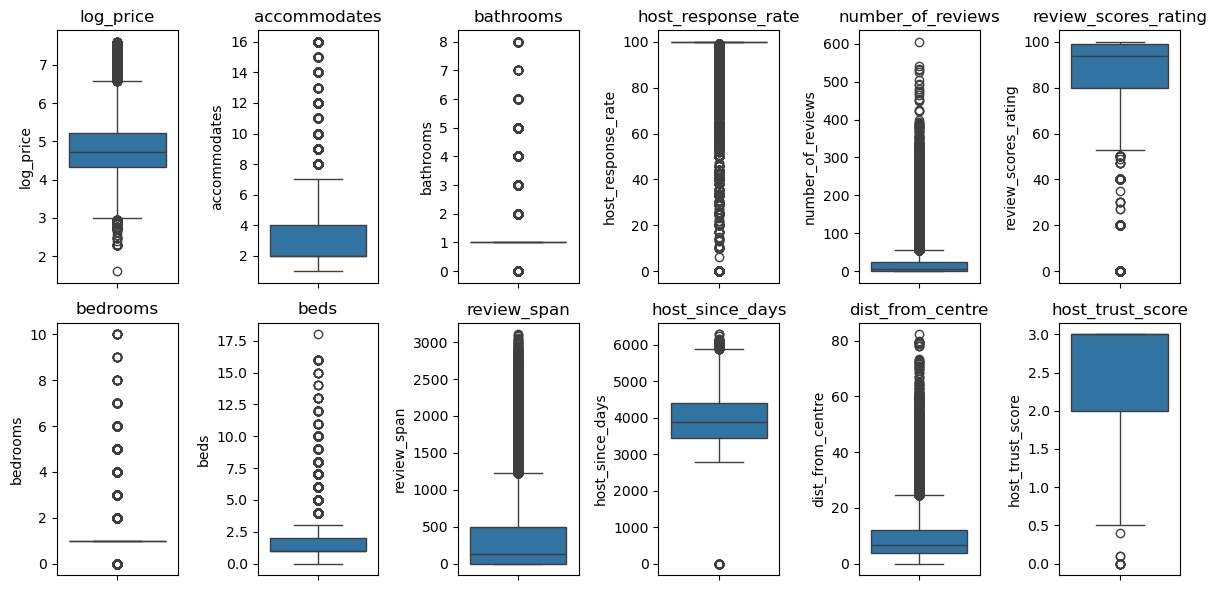

In [91]:
plt.figure(figsize = (12,6))
for i, col in enumerate(df_encoded[numerical_cols]):
    plt.subplot(2,6, i+1)
    sns.boxplot(df_encoded[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [92]:
cols_to_transform = ['accommodates', 'bathrooms', 'host_response_rate', 'number_of_reviews',
                     'review_scores_rating', 'bedrooms', 'beds', 'review_span', 'host_since_days', 'dist_from_centre']

for col in cols_to_transform:
    df_encoded[f'{col}_log'] = np.log1p(df_encoded[col])

In [93]:
df_encoded.head(5)

,log_price,property_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,...,accommodates_log,bathrooms_log,host_response_rate_log,number_of_reviews_log,review_scores_rating_log,bedrooms_log,beds_log,review_span_log,host_since_days_log,dist_from_centre_log
0,5.010635,0.66122,3,1,2,1,1,1,100.0,0,...,1.386294,0.693147,4.615121,1.098612,4.615121,0.693147,0.693147,3.433987,8.476996,1.156385
1,5.129899,0.66122,7,1,2,1,1,0,100.0,1,...,2.079442,0.693147,4.615121,1.945910,4.543295,1.386294,1.386294,3.912023,7.969704,1.959838
2,4.976734,0.66122,5,1,1,1,1,1,100.0,1,...,1.791759,0.693147,4.615121,2.397895,4.532599,0.693147,1.386294,4.927254,8.048469,2.551298
3,6.620073,0.22279,4,1,0,1,1,1,100.0,0,...,1.609438,0.693147,4.615121,0.000000,0.000000,1.098612,1.098612,0.000000,8.211754,0.751963
4,4.744932,0.66122,2,1,1,1,1,1,100.0,1,...,1.098612,0.693147,4.615121,1.609438,3.713572,0.693147,0.693147,6.432940,8.224967,1.117976


In [94]:
df_transformed = df_encoded.drop(cols_to_transform, axis = 1)

In [95]:
df_transformed.shape

(74110, 34)

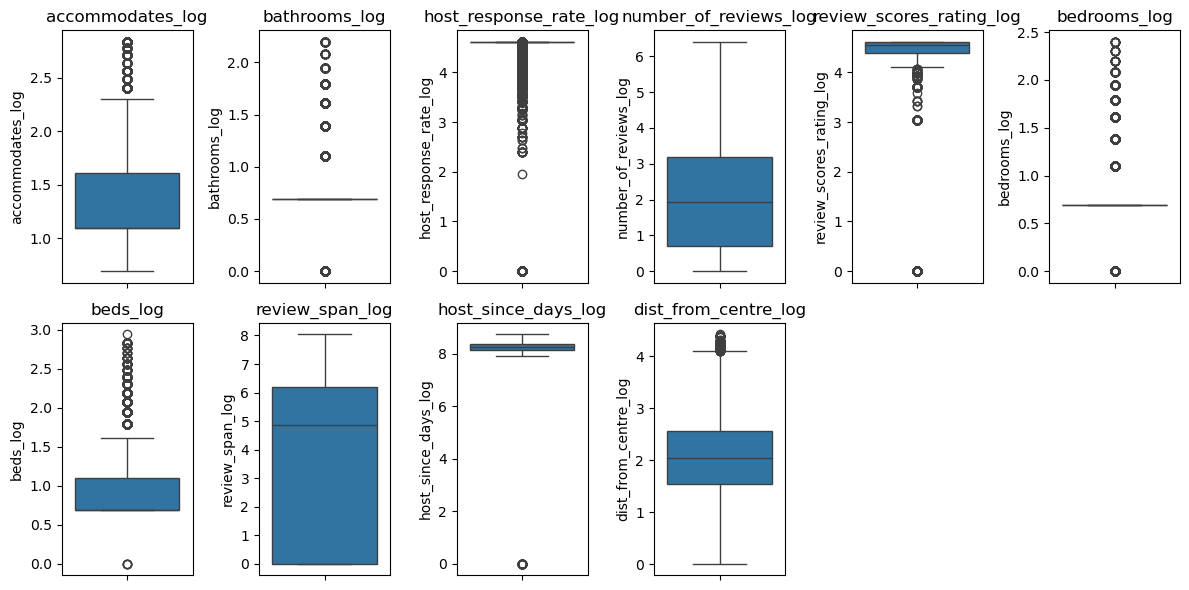

In [96]:
cols = ['accommodates_log',
       'bathrooms_log', 'host_response_rate_log', 'number_of_reviews_log',
       'review_scores_rating_log', 'bedrooms_log', 'beds_log',
       'review_span_log', 'host_since_days_log', 'dist_from_centre_log']

plt.figure(figsize = (12,6))
for i, col in enumerate(df_transformed[cols]):
    plt.subplot(2,6, i+1)
    sns.boxplot(df_transformed[col])
    plt.title(col)
plt.tight_layout()
plt.show()

#
#### Part 4 : Feature Scaling and Splitting our Data
 * After feature transformation it is important to scale our training and testing data.
 * To prevent data leakage we first split out data into training and testing test after whcih we will apply scalling as a standardisation method.

In [98]:
from sklearn.model_selection import train_test_split

y = df_transformed["log_price"]
x = df_transformed.drop("log_price", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [99]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()

x_train_scaled = pd.DataFrame(
    scaler.fit_transform(x_train),
    columns=x_train.columns,
    index=x_train.index
)

x_test_scaled = pd.DataFrame(
    scaler.transform(x_test),
    columns=x_test.columns,
    index=x_test.index
)

#### Part 5 : Feature Selection
 * We will apply **LassoCV** to perform automatic feature selection with cross-validation.
 * It will select features with **non-zero coefficients**, indicating their importance in predicting the target variable.
 * And helps reducing the dimensionality of the dataset to improve model interpretability and possibly performance.

In [101]:
from sklearn.linear_model import LassoCV

# LassoCV
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(x_train_scaled, y_train)

# Selecting features
selected_features = np.where(lasso.coef_ != 0)[0]

# Reducing datasets
x_train_selected = x_train_scaled.iloc[:, selected_features]
x_test_selected = x_test_scaled.iloc[:, selected_features]

In [160]:
x_train_scaled.shape

(59288, 33)

In [162]:
x_train_selected.shape

(59288, 26)

##
## Baseline Model Comparison

#### Importing all necessary libraries for Modelling

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
import time

####
 * We will define a function to evaluate desired evaluation metrics for each model.
 * The considered Evaluation Metrics are : RMSE and R Square

In [225]:
def evaluate_model(model, x, y, cv=5):
    scoring = {
        'rmse': 'neg_root_mean_squared_error',
        'r2': 'r2'
    }

    scores = cross_validate(model, x, y, scoring=scoring, cv=cv)

    mean_rmse = -np.mean(scores['test_rmse'])  # Negated because sklearn uses negative RMSE
    std_rmse = np.std(scores['test_rmse'])

    mean_r2 = np.mean(scores['test_r2'])
    std_r2 = np.std(scores['test_r2'])

    return mean_rmse, std_rmse, mean_r2, std_r2

####
#### To finalize the best fit model we will evaluate all these models based on the defined metrics

In [234]:
models = {
    'LinearRegression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    #'SVR': SVR(),
    'XGBoost': XGBRegressor(),
    'GradientBoosting': GradientBoostingRegressor()
}

results = {
    'Model' : [],
    'RMSE Mean' : [],
    'RMSE Std' : [],
    'R2 Mean' : [],
    'R2 Std' : [],
    'Building Time (s)' : []
}

for name, model in models.items():
    start_time = time.time()
    
    mean_rmse, std_rmse, mean_r2, std_r2 = evaluate_model(model, x_train_selected, y_train)
    
    end_time = time.time()
    building_time = end_time - start_time

    
    results['Model'].append(name)
    results['RMSE Mean'].append(mean_rmse)
    results['RMSE Std'].append(std_rmse)
    results['R2 Mean'].append(mean_r2)
    results['R2 Std'].append(std_r2)
    results['Building Time (s)'].append(building_time)

Evaluations = pd.DataFrame(results)
Evaluations.sort_values(by = ['R2 Mean', 'RMSE Mean'], ascending = False)

,Model,RMSE Mean,RMSE Std,R2 Mean,R2 Std,Building Time (s)
4,XGBoost,0.394248,0.003580,0.696768,0.003701,1.772150
3,RandomForest,0.409795,0.004451,0.672363,0.006048,177.863431
5,GradientBoosting,0.420532,0.003866,0.654985,0.004604,34.428812
0,LinearRegression,0.463549,0.003476,0.580793,0.004415,0.209357
1,KNN,0.469245,0.005280,0.570389,0.008897,9.641887
2,DecisionTree,0.581357,0.003275,0.340604,0.008426,3.083115


######
**Conclusion** -
   * As we can notice here **XGBoost** is the best candidate here with highest R2 score and lowest RMSE.
   * Followed by **RandomForest** and **GradientBoosting**.
   * We will select these 3 algorithms for further modelling, all the other models are with comparatively low R2 and high error.

#
## Model Optimization - Hyperparameter Tuning

#### For Random Forest Regression

In [249]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator= RandomForestRegressor(),
    param_distributions=param_dist,
    n_iter=65,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=101,
    n_jobs=-1
)

random_search.fit(x_train_selected, y_train)
best_rfr = random_search.best_estimator_

Fitting 3 folds for each of 65 candidates, totalling 195 fits


####
#### XGBoost Regression

In [258]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2.0]
}

random_search = RandomizedSearchCV(
    estimator= XGBRegressor(),
    param_distributions=param_dist,
    n_iter=70,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=101,
    n_jobs=-1
)

random_search.fit(x_train_selected, y_train)
best_xgbr = random_search.best_estimator_

Fitting 3 folds for each of 70 candidates, totalling 210 fits


####
#### For GradientBoost Regression

In [261]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator= GradientBoostingRegressor(),
    param_distributions=param_dist,
    n_iter=65,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=101,
    n_jobs=-1
)

random_search.fit(x_train_selected, y_train)
best_gbr = random_search.best_estimator_

Fitting 3 folds for each of 65 candidates, totalling 195 fits


##
## Model Selection

We processed hyperparameter tuning with selected regression algorithms and all optimized models are selected in **best_[model]** variable.
Now we will train our models on training data and evaluate them based on evaluation metrics. The model with high accuracy and low error will be our final model.

####
#### 1. Random Forest Regression Model

In [265]:
best_rfr.fit(x_train_selected, y_train)

rfr_y_pred = best_rfr.predict(x_test_selected)

r2_rfr = r2_score(y_test, rfr_y_pred)
mae_rfr = mean_absolute_error(y_test, rfr_y_pred)
rmse_rfr = np.sqrt(mean_squared_error(y_test, rfr_y_pred))

####
#### 2. XGBoost Regression Model

In [267]:
best_xgbr.fit(x_train_selected, y_train)

xgbr_y_pred = best_xgbr.predict(x_test_selected)

r2_xgbr = r2_score(y_test, xgbr_y_pred)
mae_xgbr = mean_absolute_error(y_test, xgbr_y_pred)
rmse_xgbr = np.sqrt(mean_squared_error(y_test, xgbr_y_pred))

####
#### 3. Gradient Boosting Regression Model

In [271]:
best_gbr.fit(x_train_selected, y_train)

gbr_y_pred = best_gbr.predict(x_test_selected)

r2_gbr = r2_score(y_test, gbr_y_pred)
mae_gbr = mean_absolute_error(y_test, gbr_y_pred)
rmse_gbr = np.sqrt(mean_squared_error(y_test, gbr_y_pred))

####
#### Evaluating the best fit model for our prediction task based on following metrics

In [274]:
Evaluation_BestM = pd.DataFrame({"Model Name" : ["Random Forest", "XGBoost", "Gradient Boosting"],
                           "MAE" : [mae_rfr, mae_xgbr, mae_gbr],
                           "RMSE" : [rmse_rfr, rmse_xgbr, rmse_gbr],
                           "R_Square" : [r2_rfr, r2_xgbr, r2_gbr]})
Evaluation_BestM

,Model Name,MAE,RMSE,R_Square
0,Random Forest,0.296045,0.407977,0.680633
1,XGBoost,0.280282,0.389711,0.708590
2,Gradient Boosting,0.290022,0.399113,0.694360


##
## Conclusion :
From the above evaluation scores, the best model is **XGBOOST** !
 * It gives lowest MAE (0.28) and lowest RMSE: (0.39) which is comparatively better than others.
 * This model provides highest co-efficient of determination (70.85 %)
 * XGBoost provided best balance of accuracy and generalization and, errors are small and consistent.

##
## Feature Importance From XGBoost Model:
We can extract and visualize feature importance from our XGBoost model.

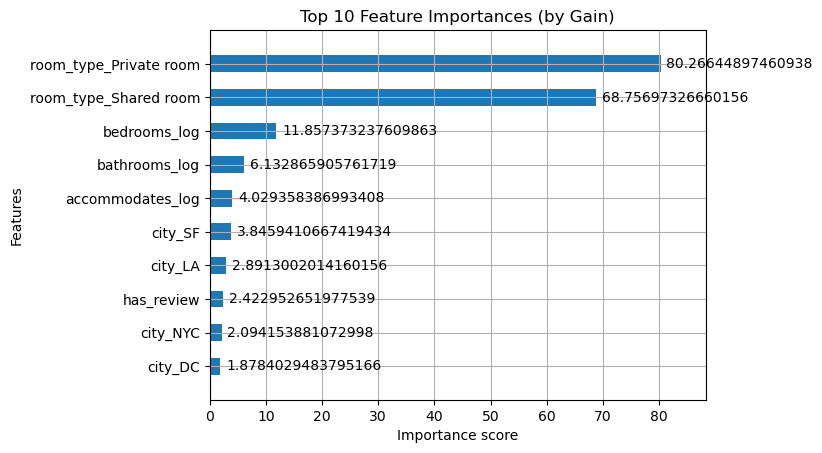

In [279]:
import xgboost as xgb

xgb.plot_importance(best_xgbr, importance_type='gain', max_num_features=10, height=0.5)
plt.title('Top 10 Feature Importances (by Gain)')
plt.show()

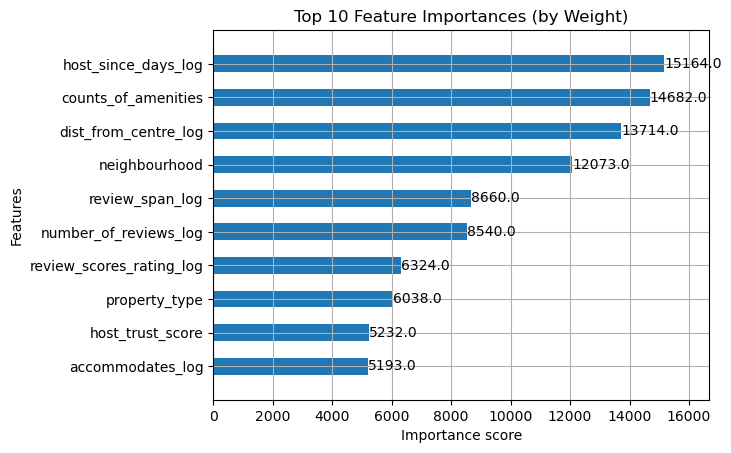

In [281]:
xgb.plot_importance(best_xgbr, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Top 10 Feature Importances (by Weight)')
plt.show()

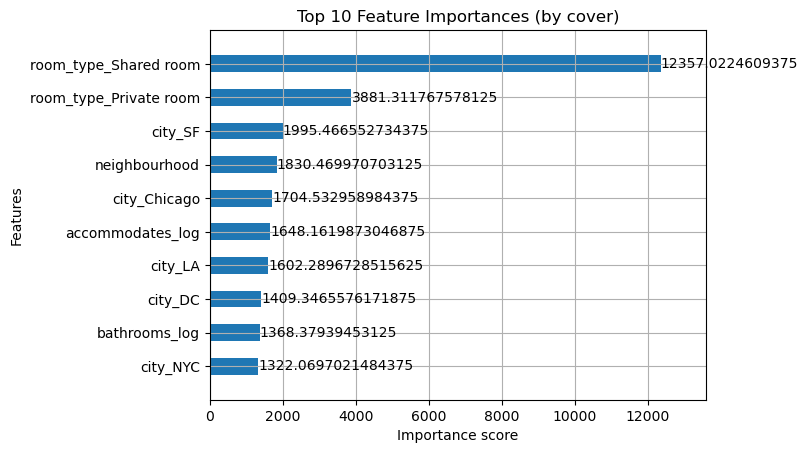

In [283]:
xgb.plot_importance(best_xgbr, importance_type='cover', max_num_features=10, height=0.5)
plt.title('Top 10 Feature Importances (by cover)')
plt.show()

In [1]:
import shap
explainer = shap.Explainer(best_xgbr)
shap_values = explainer(x_test_selected)
shap.summary_plot(shap_values, x_test_selected)

NameError: name 'best_xgbr' is not defined